In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dados

In [2]:
dados_2019 = pd.read_csv('./dados/obitos-2019.csv')
dados_2019.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
2060,MT,INSUFICIENCIA_RESPIRATORIA,IGNORADO,20 - 29,M,1
539,PB,OUTRAS,OUTROS_SERVICOS_SAUDE,< 9,I,5
6826,SC,OUTRAS,HOSPITAL,60 - 69,F,1261
7864,PI,SEPTICEMIA,DOMICILIO,70 - 79,F,9
4091,PB,PNEUMONIA,HOSPITAL,40 - 49,M,63


In [3]:
dados_2020 = pd.read_csv('./dados/obitos-2020.csv')
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
12975,SP,INSUFICIENCIA_RESPIRATORIA,IGNORADO,90 - 99,M,3
9850,SC,SEPTICEMIA,OUTRO,70 - 79,M,1
13218,CE,SEPTICEMIA,DOMICILIO,> 100,M,5
14283,PE,OUTRAS,OUTROS_SERVICOS_SAUDE,N/I,F,1
367,MG,OUTRAS,OUTROS_SERVICOS_SAUDE,< 9,F,13


## Explorando os dados

Verificando o tamanho dos dados

In [4]:
print('2019', dados_2019.shape)
print('2020', dados_2020.shape)

2019 (12339, 6)
2020 (14666, 6)


Analisando a quantidade de estados

In [5]:
len(dados_2019.uf.unique())

27

In [6]:
len(dados_2020.uf.unique())

27

Verificando os tipos de doença

In [7]:
print('2019: ')
print(sorted(dados_2019.tipo_doenca.unique()))

print('\n2020: ')
print(sorted(dados_2020.tipo_doenca.unique()))

2019: 
['COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA', 'OUTRAS', 'PNEUMONIA', 'SEPTICEMIA', 'SRAG']

2020: 
['COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA', 'OUTRAS', 'PNEUMONIA', 'SEPTICEMIA', 'SRAG']


Analisando a quantidade de vezes que cada uma das doenças aparecem nas nossas bases de dados

In [8]:
print('2019')
dados_2019.tipo_doenca.value_counts()

2019


OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [9]:
print('2020')
dados_2020.tipo_doenca.value_counts()

2020


OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

Agora, vamos visualizar a quantidade de óbitos por cada doença

In [10]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12339 non-null  object
 1   tipo_doenca   12339 non-null  object
 2   local_obito   12339 non-null  object
 3   faixa_etaria  12339 non-null  object
 4   sexo          12337 non-null  object
 5   total         12339 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 578.5+ KB


Temos apenas uma coluna numérica, a coluna total

In [11]:
print('2019')
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
print(total_obitos_2019)

print('\n2020')
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
print(total_obitos_2020)

2019
                             total
tipo_doenca                       
COVID                            1
INDETERMINADA                 6977
INSUFICIENCIA_RESPIRATORIA  100361
OUTRAS                      658891
PNEUMONIA                   225933
SEPTICEMIA                  175104
SRAG                          1497

2020
                             total
tipo_doenca                       
COVID                       177299
INDETERMINADA                 9063
INSUFICIENCIA_RESPIRATORIA   93304
OUTRAS                      647807
PNEUMONIA                   171938
SEPTICEMIA                  153033
SRAG                         15715


Quanto tivemos de acréscimo (ou decréscimo) dessas doenças respiratórias de um ano para outro?

In [12]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


Podemos perceber que os óbitos por SRAG aumentou mais de 10 vezes de 2019 para 2020

## Visualizando os dados

In [13]:
def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize = (8, 6))
    sns.barplot(x = 'Ano', y = 'Total', data = dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()

    return dados
    

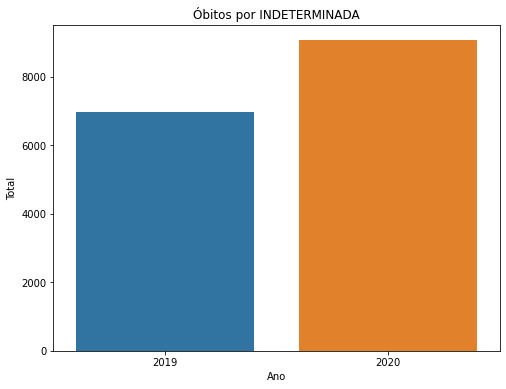

,Total,Ano
0,6977,2019
1,9063,2020


In [14]:
grafico_comparativo('INDETERMINADA')

## Criando uma função que mostra os óbitos por doença e por estado

In [15]:
def grafico_comparativo(causa = 'ALL', estado = 'BRASIL'):

    if estado == 'BRASIL':
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    else:
        total_2019 = dados_2019.groupby(['uf', 'tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf', 'tipo_doenca']).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]


    dados = pd.DataFrame({'Total': lista, 'Ano': [2019, 2020]})

    plt.figure(figsize = (8, 6))
    sns.barplot(x = 'Ano', y = 'Total', data = dados)
    plt.title(f'Óbitos por {causa} -> {estado}')
    plt.show()

    return dados

In [16]:
def grafico_comparativo_2(estado = 'BRASIL'):

    total_2019 = dados_2019.groupby(['uf', 'tipo_doenca']).sum()
    total_2020 = dados_2020.groupby(['uf', 'tipo_doenca']).sum()
    lista = [total_2019.loc[estado], total_2019.loc[estado]]

    fig, (ax1, ax2)= plt.subplots(1, 2, figsize = (17, 8))
    ax1.set_title(f'Óbitos por doença e por estado - {estado} - 2019')
    ax2.set_title(f'Óbitos por doença e por estado - {estado} - 2020')
    
    sns.barplot(y = lista[0].index, x = lista[0].total, ax = ax1, orient = 'h')
    sns.barplot(y = lista[1].index, x = lista[1].total, ax = ax2, orient = 'h')
    ax2.set_ylabel('')
    fig.tight_layout(pad=7.0)





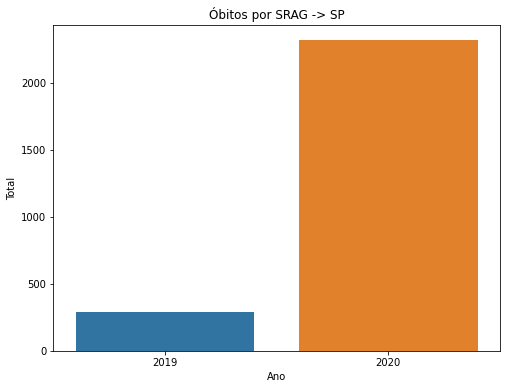

,Total,Ano
0,293,2019
1,2317,2020


In [17]:
grafico_comparativo('SRAG', 'SP')

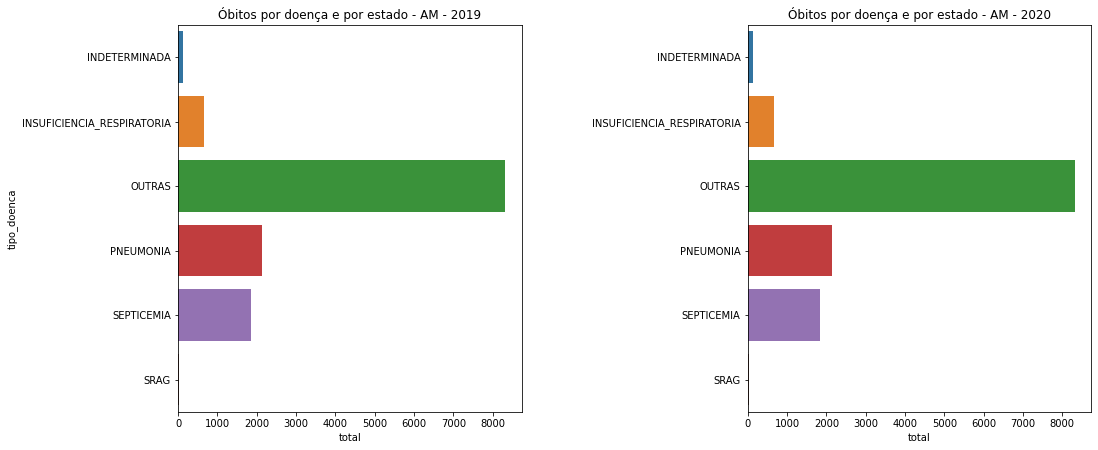

In [18]:
grafico_comparativo_2('AM')

## Desafios

Desafio 01 - Acesse o portal da transparência e leia sobre como são feitas as classificações por tipo de óbito e como são obtidos os dados. 

Desafio 02 - Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir

Desafio 03 - Nesta análise trabalhamos apenas com a informação de óbito, agora queremos que você explore as outras informações da base de dados para enriquecer mais sua aplicação final. Veja o que descobre de interessante e compartilhe no Discord

Desafio 04 - Que tal deixar a função que criamos para gerar os gráficos ainda melhor, acrescente um filtro para pode selecionar o estado que gostaria de visualizar

Desafio 05 - Como você sabe neste curso vamos aprender como criar uma aplicação web para ciência de dados com o Streamlit, que é uma ferramenta de alto nível abstraindo muitas coisas. Entender, mesmo que superficialmente, como uma aplicação-web funciona é interessante para você conhecer o que está acontecendo por baixo dos panos do Streamlit, por isso queremos que você pesquise um pouco sobre como funciona o Web. Neste vídeo o Sérgio Lopes, CTO da Alura faz uma explicação geral de como as coisas acontecem em uma aplicação.

Desafio 06 - A função que melhoramos no vídeo 2.3 da para ficar ainda melhor, agora queremos que você acrescente a opção de selecionar apenas o estado e visualizar os totais de óbitos.

Desafio 07 - Nesta aula criamos nossa primeira aplicação com o Streamlit e nosso desafio é que você explore a documentação da ferramenta, entre nos códigos fontes (github) dos exemplos, explore os métodos e afins.

Desafio 08 - Na aula passada pedimos para você explorar a documentação, agora queremos que dê uma olhada nos chamados comandos mágicos do streamlit, como funciona e compartilhe conosco as vantagens e desvantagens que você identificou. 

Desafio extra - Não deixe de ir reproduzindo o código que estamos desenvolvendo na aula para você exercitar e realizar os testes dessa nova ferramenta.